In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

%matplotlib inline
import numpy as np
import glob
from pprint import pprint
from tensorflow.keras.preprocessing.image import *

physical_device = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_device[0], True)

In [22]:
# discriminator_path = '/root/训练完成/discriminator_model.h5'
discriminator_path = '/root/model_weight/discriminator_model516Daynight.h5'
# generator_path = '/root/训练完成/generator_model.h5'
test_image_path = '/root/images/original_images/test'

# 定义类别标签
# class_labels = []
# for subdir in os.listdir(test_image_path):
#         class_labels.append(subdir)

# print(class_labels)

In [23]:
def load_images(path):
    img = tf.io.read_file(path) # 读取路径下的文件
    img = tf.image.decode_jpeg(img) # 对读取到的图像解码之后就是正常的图像了
    img = tf.image.resize(img, (128,128)) # 把图像resize到80*80
    img = tf.image.random_crop(img, [112, 112, 3]) # 把图像随机裁剪成64*64
    # img = tf.image.random_flip_left_right(img) # 把图像左右翻转
    img = img / 127.5 - 1
    return img

# 使用内部函数评估
def evaluateTestData(modelWeightPath, testDirPath):
    # 加载保存的模型参数
    model = tf.keras.models.load_model(modelWeightPath)

    # 定义测试集路径
    test_dir = testDirPath
    
    # 归一化
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    # 构建测试数据集
    test_dataset = datagen.flow_from_directory(
        test_dir,
        target_size=(112,112),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # 对测试集进行预测
    predictions = model.predict(test_dataset)

    print("已获得predictions")
    # 获取预测结果和真实标签
    predicted_labels = tf.argmax(predictions[1], axis=1)
    true_labels = test_dataset.labels

    # TODO:这里的Prediction是一个矩阵，代表着预测概率，因为训练集和测试集的class类可能不同会不会导致结果反了
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
    print('Accuracy:', accuracy.numpy())

   
    # 计算混淆矩阵
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    # 绘制混淆矩阵
    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_mat, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.colorbar()

    # 设置标签
    labels = test_dataset.class_indices.keys()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    # 在矩阵方格中添加数值标签
    thresh = confusion_mat.max() / 2
    for i in range(confusion_mat.shape[0]):
        for j in range(confusion_mat.shape[1]):
            plt.text(j, i, format(confusion_mat[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if confusion_mat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

Found 399 images belonging to 3 classes.
已获得predictions
Accuracy: 0.49624062


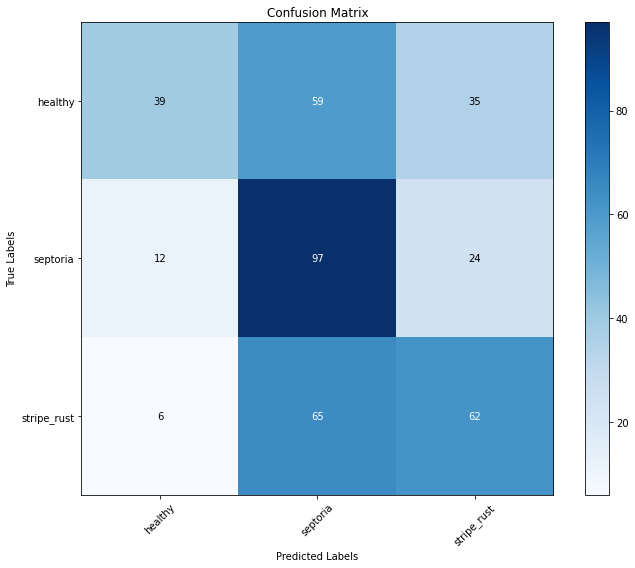

In [24]:
evaluateTestData(discriminator_path, test_image_path)
